#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aakas\AppData\Local\Temp\ipykernel_18288\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Reading Dataset

In [2]:
network = pd.read_csv("assignment5-dataset.csv")

In [3]:
network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Checking and Replacing Missing Values

In [4]:
network.replace("?", np.nan, inplace=True)

In [5]:
network.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
network["Gender"].replace("Male", 0, inplace=True)
network["Gender"].replace("Female", 1, inplace=True)

C:\Users\aakas\AppData\Local\Temp\ipykernel_18288\632014200.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  network["Gender"].replace("Male", 0, inplace=True)
C:\Users\aakas\AppData\Local\Temp\ipykernel_18288\632014200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [7]:
network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [8]:
max_salary = network["EstimatedSalary"].max()
min_salary = network["EstimatedSalary"].min()

print(max_salary, min_salary)

150000 15000


#### Finding Correlation between all Columns

In [9]:
correlation = network.corr()
correlation

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,0.025249,-0.000721,0.071097,0.007120
Gender,0.025249,1.000000,0.073741,0.060435,0.042469
Age,-0.000721,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,0.042469,0.622454,0.362083,1.000000


#### Plotting Heatmap

<Axes: >

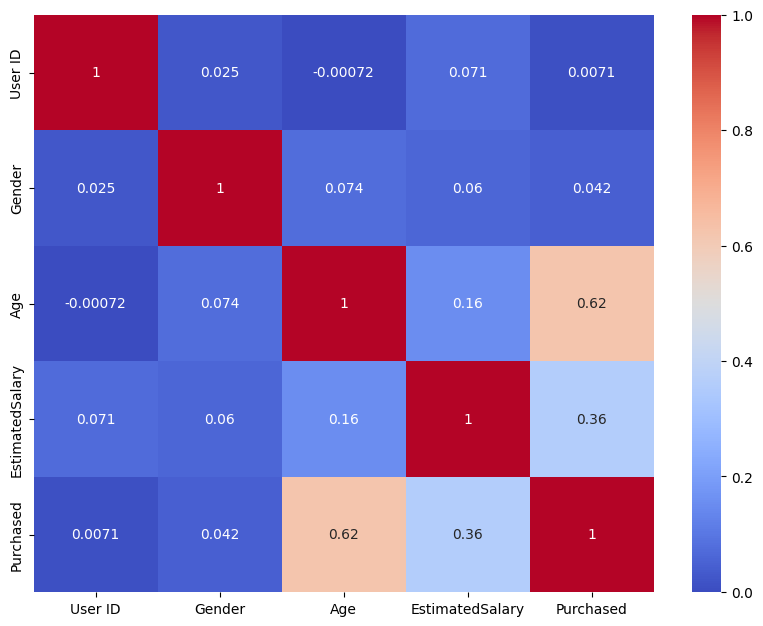

In [10]:
plt.figure(figsize=(10, 7.5))
sns.heatmap(correlation, annot=True, cmap="coolwarm")

#### Logistic Regression

In [11]:
x = network.iloc[:,2:-1]
y = network.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [14]:
x_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
14,18,82000
363,42,79000
304,40,60000
361,53,34000


#### Applying Scaling for better Accuracy

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
max_salary = x_test[1].max()
min_salary = x_test[1].min()

print(max_salary, min_salary)

-0.021264850777441783 -0.5773590622674106


In [18]:
model = LogisticRegression(random_state=0)

In [19]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [20]:
y_pred = model.predict(x_test)

#### Plotting Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

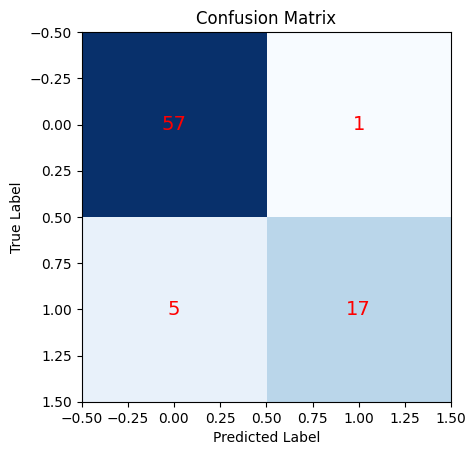

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap="Blues")

plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=14, color='red')

plt.show()

#### Calculating Accuracy

In [23]:
log_accuracy = accuracy_score(y_test, y_pred)
log_accuracy*100

92.5

#### Classification Report

In [24]:
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report


{'0': {'precision': 0.9193548387096774,
  'recall': 0.9827586206896551,
  'f1-score': 0.95,
  'support': 58.0},
 '1': {'precision': 0.9444444444444444,
  'recall': 0.7727272727272727,
  'f1-score': 0.85,
  'support': 22.0},
 'accuracy': 0.925,
 'macro avg': {'precision': 0.9318996415770608,
  'recall': 0.8777429467084639,
  'f1-score': 0.8999999999999999,
  'support': 80.0},
 'weighted avg': {'precision': 0.9262544802867383,
  'recall': 0.925,
  'f1-score': 0.9225,
  'support': 80.0}}

In [27]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


#### Scatter Plot with Regression Line

c:\Users\aakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\Users\aakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


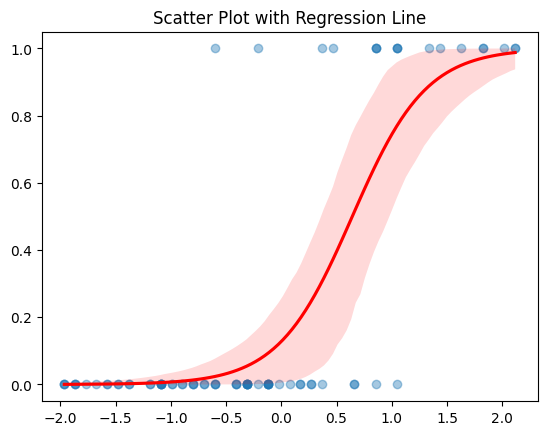

In [43]:
sns.regplot(data = network, x=x_test[:, 0], y=y_pred, logistic=True, scatter_kws={"alpha":0.4},line_kws={"color":"red"})

plt.title("Scatter Plot with Regression Line")
plt.show()